Saving , Deploying, Testing Models

In [3]:
# Simple Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('/content/salary.csv')

X = df[['YearsExperience']]


y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [9]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**2

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R2 Score: 0.9024461774180497
Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Squared Error: 2483038552669211.0


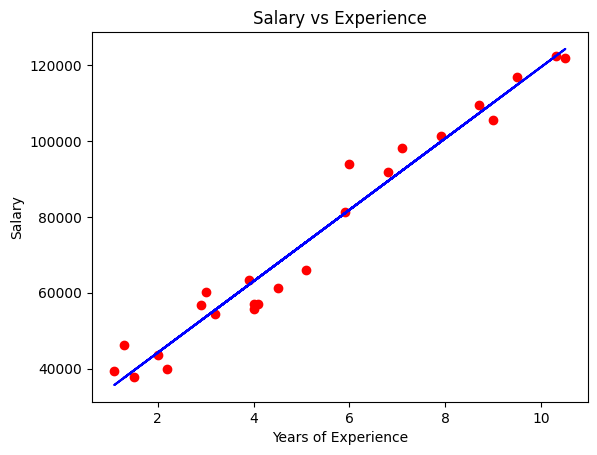

In [14]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

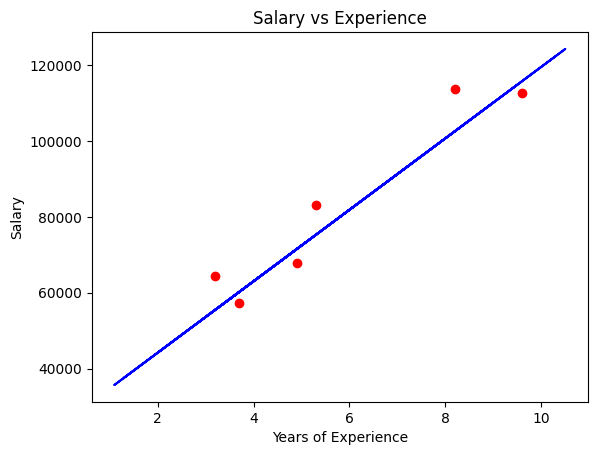

In [15]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [16]:
print("*** Making prediction for new data ***")

new_exp_years = [1, 5, 4, 8, 12, 15, 20, 25]

for exp in new_exp_years:

  new_salary = model.predict(pd.DataFrame({'YearsExperience': [exp]}))

  print(f"Years of experience : {exp} ---> Predicted salary : {new_salary}")

*** Making prediction for new data ***
Years of experience : 1 ---> Predicted salary : [34745.39833481]
Years of experience : 5 ---> Predicted salary : [72440.65962693]
Years of experience : 4 ---> Predicted salary : [63016.8443039]
Years of experience : 8 ---> Predicted salary : [100712.10559602]
Years of experience : 12 ---> Predicted salary : [138407.36688815]
Years of experience : 15 ---> Predicted salary : [166678.81285724]
Years of experience : 20 ---> Predicted salary : [213797.8894724]
Years of experience : 25 ---> Predicted salary : [260916.96608755]


In [17]:
import joblib

joblib.dump(model, 'salary_model.pkl')

print(X)

print(list(X.columns))

joblib.dump(list(X.columns), 'salary_column-names.pkl')

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
['YearsExperience']


['salary_column-names.pkl']

In [18]:
loaded_model = joblib.load('salary_model.pkl')

loaded_column_names = joblib.load('salary_column-names.pkl')

print("*** Making prediction for new data using loaded model ***")

new_exp_years = [1, 5, 4, 8, 12, 15, 20, 25]

for exp in new_exp_years:

  new_salary = loaded_model.predict(pd.DataFrame({'YearsExperience': [exp]}))

  print(f"Years of experience : {exp} ---> Predicted salary : {new_salary}")

*** Making prediction for new data using loaded model ***
Years of experience : 1 ---> Predicted salary : [34745.39833481]
Years of experience : 5 ---> Predicted salary : [72440.65962693]
Years of experience : 4 ---> Predicted salary : [63016.8443039]
Years of experience : 8 ---> Predicted salary : [100712.10559602]
Years of experience : 12 ---> Predicted salary : [138407.36688815]
Years of experience : 15 ---> Predicted salary : [166678.81285724]
Years of experience : 20 ---> Predicted salary : [213797.8894724]
Years of experience : 25 ---> Predicted salary : [260916.96608755]


In [20]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import pickle

app = Flask(__name__)

model = joblib.load("/content/salary_model.pkl")
col_names = joblib.load("/content/salary_column-names.pkl")


@app.route('/')
def hello() -> str:

    return 'Hello world from Flaskl'


@app.route('/predict', methods=['POST'])

def predict():

    user_data = request.json

    df = df.reindex(columns=col_names)

    prediction = list(model.predict(df))

    return jsonify({'prediction': list(prediction)})


if __name__ == '__main__':

    app.run(debug=True, port = 5000, host = '0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
